In [6]:
!pip install imblearn

In [7]:
!pip install yellowbrick

In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import imblearn
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import pickle
from yellowbrick.model_selection import cv_scores,FeatureImportances

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
stk=pd.read_csv('healthcare-dataset-stroke-data (1).csv')
stk

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
stk.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
stk=stk.drop('id',1)
stk.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
stk.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
stk['bmi']=stk['bmi'].fillna(stk['bmi'].median())

In [14]:
# encoding
obj=stk.select_dtypes(include='O')
obj.columns


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [15]:
objj=['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']

In [16]:
for ob in objj:
    stk[ob]=le.fit_transform(stk[ob])
stk.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [17]:
# separate the target and independent variables
a=stk.drop('stroke',1)# independent variables
b=stk.stroke#dependent variable

In [18]:
# splitting the dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.20,random_state=0)

In [19]:
# building the model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
# test the model
dt_pred=dt.predict(x_test)

In [21]:
# check the model performance
print('accuracy',accuracy_score(dt_pred,y_test))

accuracy 0.9148727984344422


In [22]:
# confusion matrix
print('confusion_matrix',confusion_matrix(dt_pred,y_test))

confusion_matrix [[930  49]
 [ 38   5]]


In [23]:
# Classification

In [24]:
loan=pd.read_csv('loan.csv')
loan

,Unnamed: 0,Income,Savings,Home_ownership,Credit_history,Open_accounts,Credit_cards,Overdraft,Student_Loan,Non_perfoming_Accs,Open_Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,Grade,Loan_Defaulters
0,0,123970,264110,Own Home,18,4,2,1,0,4,2,0,12400,0.0,AA,0
1,1,101907,101922,Rent,6,5,0,1,0,7,2,2,15300,4590.0,GG,1
2,2,97331,112457,Mortgage,11,4,0,1,0,11,3,0,14600,0.0,DD,0
3,3,106189,108758,Rent,10,4,0,0,0,10,2,2,21200,6360.0,FF,0
4,4,55705,3793,Rent,1,1,0,0,1,0,1,1,16700,11690.0,EE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,98160,102251,Rent,11,4,0,1,0,10,2,2,19600,5880.0,FF,0
9996,9996,113097,141164,Own Home,6,6,0,1,0,8,2,0,17000,0.0,CC,0
9997,9997,59887,4321,Rent,1,2,0,2,1,4,1,1,18000,12600.0,GG,1
9998,9998,56866,3115,Rent,1,1,0,1,1,2,2,2,17100,11970.0,FF,0


In [25]:
loan.isna().sum()

Unnamed: 0             0
Income                 0
Savings                0
Home_ownership         0
Credit_history         0
Open_accounts          0
Credit_cards           0
Overdraft              0
Student_Loan           0
Non_perfoming_Accs     0
Open_Accounts          0
Current_In_Arrears     0
Current_balance_Amt    0
Past_due_Amt           0
Grade                  0
Loan_Defaulters        0
dtype: int64

In [26]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [27]:
loan.dtypes

Unnamed: 0               int64
Income                   int64
Savings                  int64
Home_ownership          object
Credit_history           int64
Open_accounts            int64
Credit_cards             int64
Overdraft                int64
Student_Loan             int64
Non_perfoming_Accs       int64
Open_Accounts            int64
Current_In_Arrears       int64
Current_balance_Amt      int64
Past_due_Amt           float64
Grade                   object
Loan_Defaulters          int64
dtype: object

In [28]:
loan1=loan.copy()

In [29]:
obj=loan.select_dtypes(include='O')
obj.columns

Index(['Home_ownership', 'Grade'], dtype='object')

In [30]:
obj=['Home_ownership','Grade']

In [31]:
for c in obj:
    loan1[c]=le.fit_transform(loan1[c])
    

In [32]:
loan1=loan1.drop('Unnamed: 0',1)
loan1.columns

Index(['Income', 'Savings', 'Home_ownership', 'Credit_history',
       'Open_accounts', 'Credit_cards', 'Overdraft', 'Student_Loan',
       'Non_perfoming_Accs', 'Open_Accounts', 'Current_In_Arrears',
       'Current_balance_Amt', 'Past_due_Amt', 'Grade', 'Loan_Defaulters'],
      dtype='object')

In [33]:
loan1.dtypes

Income                   int64
Savings                  int64
Home_ownership           int64
Credit_history           int64
Open_accounts            int64
Credit_cards             int64
Overdraft                int64
Student_Loan             int64
Non_perfoming_Accs       int64
Open_Accounts            int64
Current_In_Arrears       int64
Current_balance_Amt      int64
Past_due_Amt           float64
Grade                    int64
Loan_Defaulters          int64
dtype: object

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# separating independent and dependent variables
x=loan1.drop('Loan_Defaulters',1)# independent variables
y=loan1['Loan_Defaulters']# dependent variable

In [36]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [37]:
# classification evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [38]:
# classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# RandomForest

In [39]:
rf=RandomForestClassifier(random_state=0)

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
rf_pred=rf.predict(x_test)

In [42]:
print('accuracy',accuracy_score(rf_pred,y_test))
print('recall',recall_score(rf_pred,y_test))
print('precision',precision_score(rf_pred,y_test))
print('f1score',f1_score(rf_pred,y_test))

accuracy 0.9655
recall 0.9941520467836257
precision 0.912751677852349
f1score 0.9517144856543038


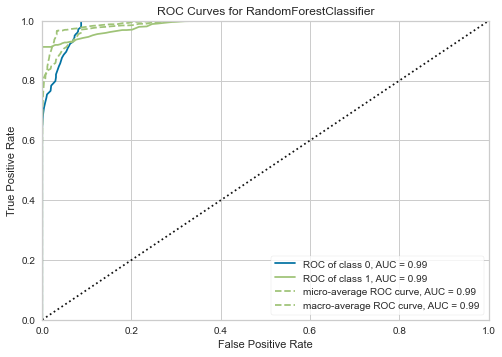

In [43]:
from yellowbrick.classifier import ROCAUC
rf=RandomForestClassifier()
roc_rf=ROCAUC(rf)
roc_rf.fit(x_train,y_train)
roc_rf.score(x_test,y_test)
roc_rf.show();

# decision tree

In [44]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
dt_pred=dt.predict(x_test)

In [46]:
print('accuracy',accuracy_score(dt_pred,y_test))
print('recall',recall_score(dt_pred,y_test))
print('precision',precision_score(dt_pred,y_test))
print('f1score',f1_score(dt_pred,y_test))

accuracy 0.942
recall 0.9221476510067114
precision 0.9221476510067114
f1score 0.9221476510067114


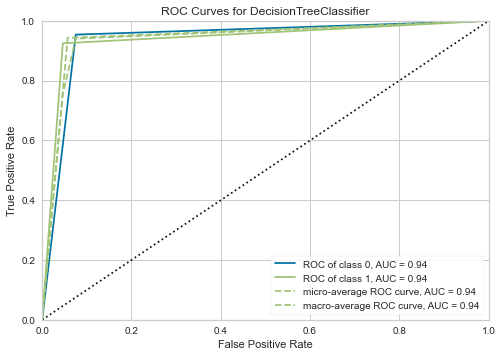

In [47]:
from yellowbrick.classifier import ROCAUC
dt=DecisionTreeClassifier()
roc_dt=ROCAUC(dt)
roc_dt.fit(x_train,y_train)
roc_dt.score(x_test,y_test)
roc_dt.show();

 # Gradient boosting

In [48]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [49]:
gb_pred=gb.predict(x_test)

In [51]:
print('accuracy',accuracy_score(gb_pred,y_test))
print('recall',recall_score(gb_pred,y_test))
print('precision',precision_score(gb_pred,y_test))
print('f1score',f1_score(gb_pred,y_test))

accuracy 0.9675
recall 1.0
precision 0.912751677852349
f1score 0.9543859649122807


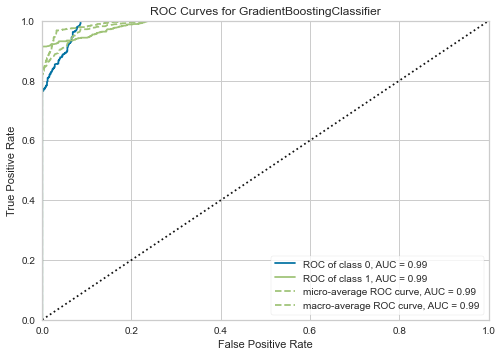

In [52]:
gb=GradientBoostingClassifier()
roc_gb=ROCAUC(gb)
roc_gb.fit(x_train,y_train)
roc_gb.score(x_test,y_test)
roc_gb.show();

# AdaBoost 

In [53]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [54]:
ab_pred=ab.predict(x_test)

In [55]:
print('accuracy',accuracy_score(ab_pred,y_test))
print('recall',recall_score(ab_pred,y_test))
print('precision',precision_score(ab_pred,y_test))
print('f1score',f1_score(ab_pred,y_test))

accuracy 0.9665
recall 0.9970674486803519
precision 0.912751677852349
f1score 0.9530483531885074


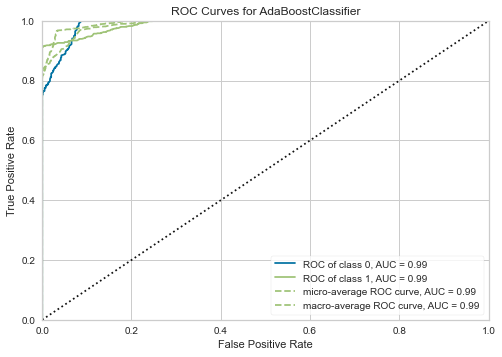

In [56]:
ab=AdaBoostClassifier()
roc_ab=ROCAUC(ab)
roc_ab.fit(x_train,y_train)
roc_ab.score(x_test,y_test)
roc_ab.show();

In [57]:
from yellowbrick.model_selection import cv_scores,FeatureImportances

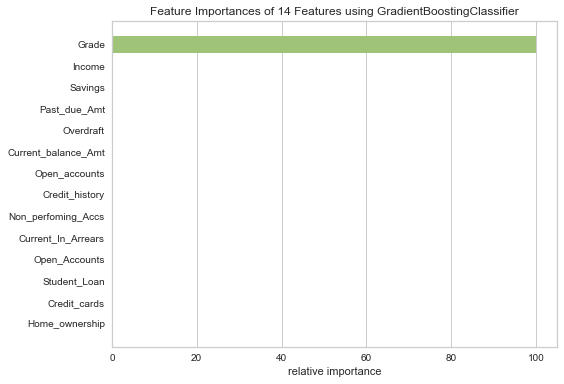

<AxesSubplot:title={'center':'Feature Importances of 14 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [58]:
gb=GradientBoostingClassifier()
imp=FeatureImportances(gb)
imp.fit(x_train,y_train)
imp.show()

In [59]:
import pickle

In [60]:
model=GradientBoostingClassifier().fit(x,y)
model.score(x,y)

0.9709

In [61]:
# saving the model
model_filename='GradientBoosting.pkl'
pickle.dump(model,open('GradientBoosting.pkl','wb'))

In [62]:
loan1.head(5)

,Income,Savings,Home_ownership,Credit_history,Open_accounts,Credit_cards,Overdraft,Student_Loan,Non_perfoming_Accs,Open_Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,Grade,Loan_Defaulters
0,123970,264110,1,18,4,2,1,0,4,2,0,12400,0.0,0,0
1,101907,101922,2,6,5,0,1,0,7,2,2,15300,4590.0,6,1
2,97331,112457,0,11,4,0,1,0,11,3,0,14600,0.0,3,0
3,106189,108758,2,10,4,0,0,0,10,2,2,21200,6360.0,5,0
4,55705,3793,2,1,1,0,0,1,0,1,1,16700,11690.0,4,0


In [63]:
# loading the model
model=pickle.load(open('GradientBoosting.pkl','rb'))
print(model.predict([[101907,101922,2,6,5,0,1,0,7,2,2,15300,4590.0,6]]))

[1]
